# Plotting Scenarios and Solutions

Both input data and output data can be plotted.

Currently, two default plots are available: ``.line()`` and ``.bar()``.

Consider the 'Scheduling Example'

In [7]:
from energia.library.examples.energy import scheduling 
m = scheduling()

⚖   Initiated wind balance in (l0, y)                                       ⏱ 0.0001 s
🔗  Bound [≤] wind consume in (l0, y)                                        ⏱ 0.0009 s
⚖   Initiated power balance in (l0, q)                                      ⏱ 0.0001 s
🔗  Bound [≥] power release in (l0, q)                                       ⏱ 0.0008 s
🔗  Bound [≤] wf operate in (l0, q)                                          ⏱ 0.0002 s
🧭  Mapped time for operate (wf, l0, q) ⟺ (wf, l0, y)                        ⏱ 0.0008 s
🔗  Bound [=] usd spend in (l0, q)                                           ⏱ 0.0003 s
💡  Assumed wf capacity unbounded in (l0, y)                                 ⏱ 0.0001 s
💡  Assumed wf operate bounded by capacity in (l0, q)                        ⏱ 0.0001 s
⚖   Updated power balance with produce(power, l0, q, operate, wf)           ⏱ 0.0001 s
🔗  Bound [=] power produce in (l0, q)                                       ⏱ 0.0008 s
⚖   Updated wind balance with expend(wind, 

## Input Data (Scenario)

The following attributes can be used to access specific data: 

|Type          | Attribute|
|--------------|----------|
| Upper Bounds | .ubs     |
| Lower Bounds | .lbs     |
| Exact Bounds | .eqs     |
| Calculation Parameters | .calcs     |


### Bound Example

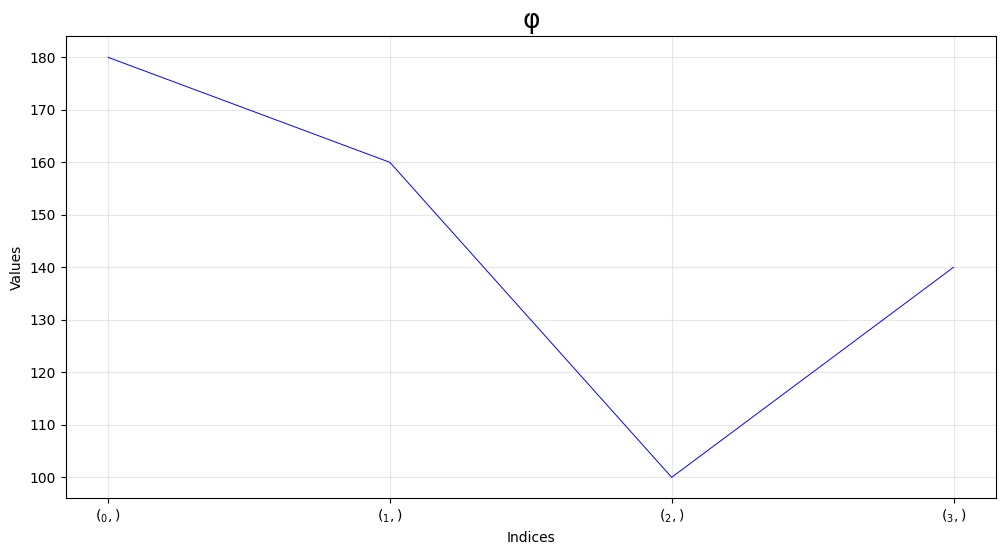

In [8]:
m.scenario.ubs[m.operate][m.wf][m.l0][m.q].line()

### Calculation Parameter Example

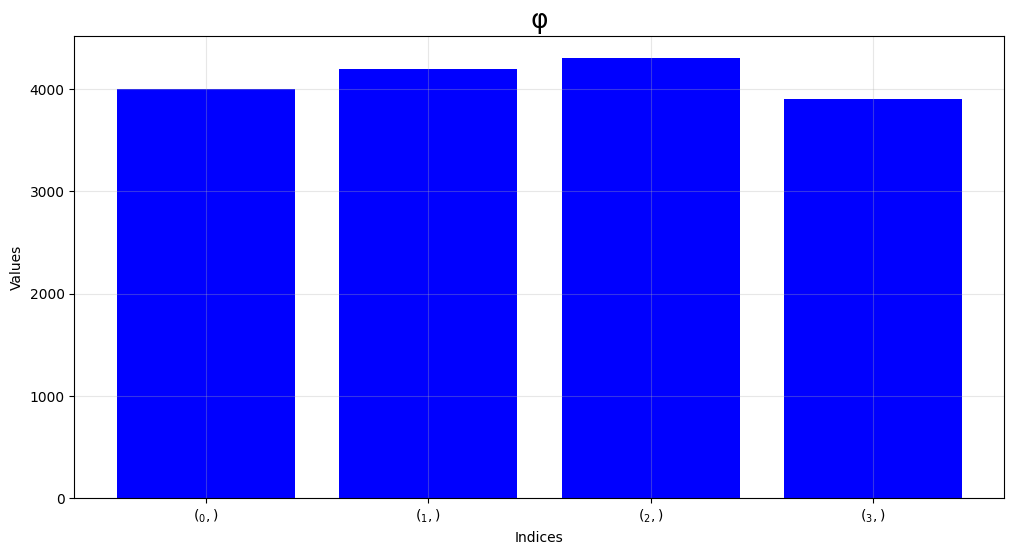

In [9]:
m.scenario.calcs[m.spend][m.usd][m.l0][m.q][m.operate][m.wf].bar()

## Output Data (Solution)

The solution can be accessed. 

Note that ``.solutions[n_solution]`` will return n $^{\text{th}}$ solution.

First let us generate the solution:

In [10]:
m.usd.spend.opt()

🧭  Mapped time for spend (usd, l0, q, operate, wf) ⟺ (usd, l0, y)           ⏱ 0.0002 s
📝  Generated Program(scheduling).mps                                        ⏱ 0.0019 s


Read MPS format model from file Program(scheduling).mps
Reading time = 0.00 seconds
PROGRAM(SCHEDULING): 25 rows, 20 columns, 47 nonzeros


📝  Generated gurobipy model. See .formulation                               ⏱ 0.0042 s


Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (win64 - Windows 11.0 (26100.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13700, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 24 logical processors, using up to 24 threads

Optimize a model with 25 rows, 20 columns and 47 nonzeros
Model fingerprint: 0x6d9897df
Coefficient statistics:
  Matrix range     [1e+00, 4e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+01, 4e+02]
Presolve removed 25 rows and 20 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0810000e+06   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.081000000e+06


📝  Generated Solution object for Program(scheduling). See .solution         ⏱ 0.0001 s
✅  Program(scheduling) optimized using gurobi. Display using .output()      ⏱ 0.0107 s


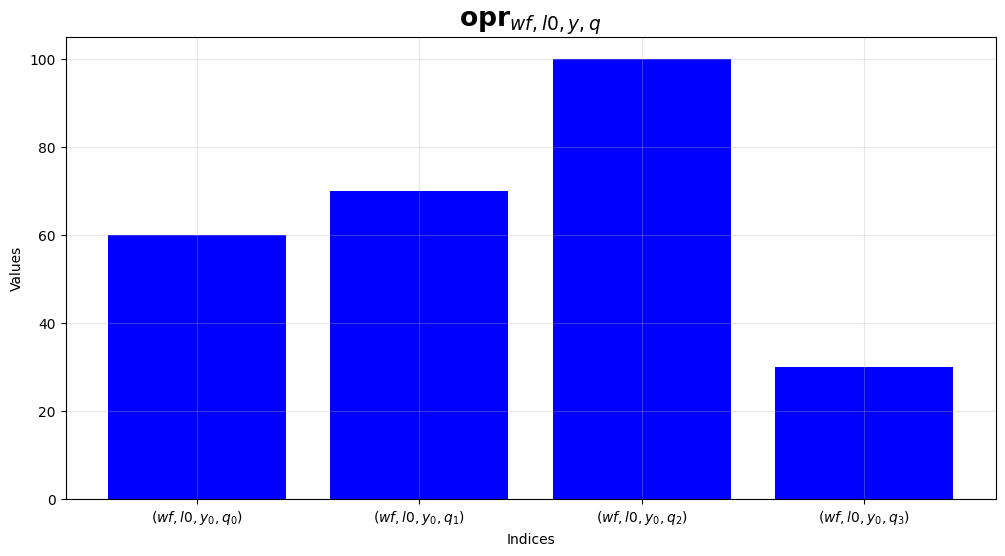

In [11]:
m.operate(m.wf, m.l0, m.q).bar()

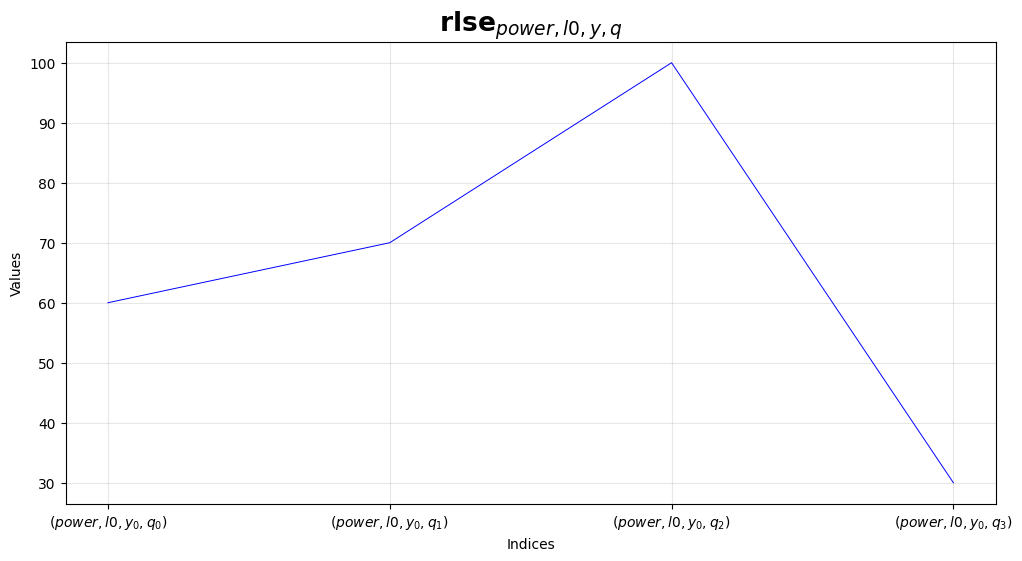

In [12]:
m.power.release(m.l0, m.q).line()
# same as m.release(m.power, m.l0, m.q).line()